In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

## Unzip the train data

In [ ]:
!unzip Train_UQcUa52.zip

## Load the data

In [6]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [7]:
!pwd

/content


In [13]:
image_path = 'Images/train/'

In [14]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [15]:
y = df['label']

In [16]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


## Exploratory Data Analysis

9


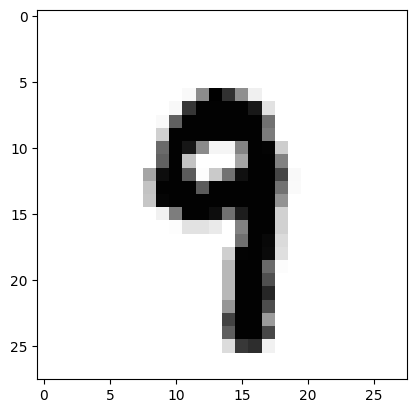

In [18]:
image_index = 1
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


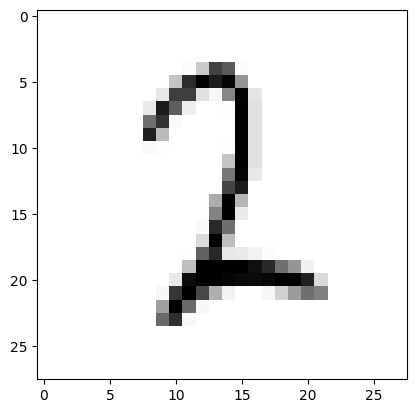

In [19]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

## Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

## Normalisation

In [21]:
x_train /= 255
x_test /= 255

## Model Creation

In [22]:
input_shape = (28,28,1)
output_class = 10

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

In [25]:
model.save('image-classification-model.h5')

1/1 [==============================] - 0s 135ms/step
Predicted output: 1


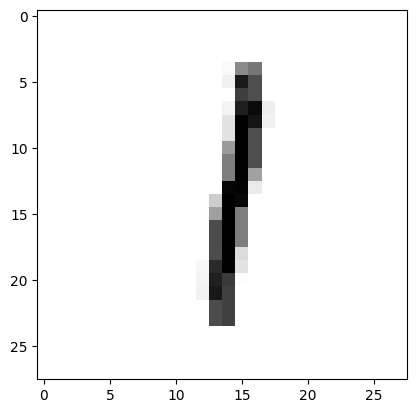

In [26]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 [==============================] - 0s 44ms/step
Predicted output: 7


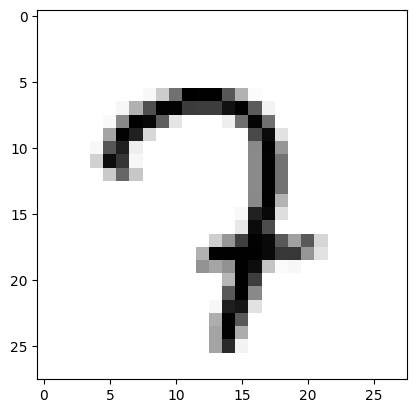

In [28]:
image_index = 67
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

In [29]:
from keras.models import load_model

loaded_model = load_model('image-classification-model.h5')

1/1 [==============================] - 0s 17ms/step
Predicted output: 4


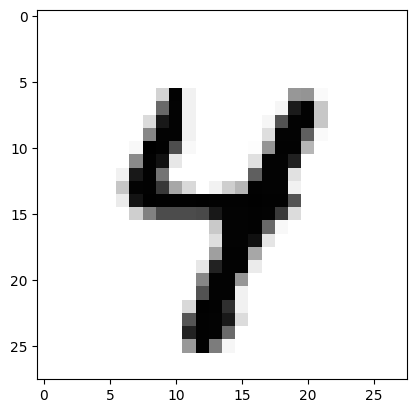

In [32]:
image_index = 110
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = loaded_model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())